**Business Understanding for Used Car Dataset**

Objective

The primary objective of this dataset analysis is to develop a model for predicting the selling price of used cars. This can help both sellers and buyers in making informed decisions. The analysis will utilize the provided features to understand the factors that influence the price of used cars and exemplify the application of linear regression in Machine Learning.

Dataset Columns Description

- name: The brand and model of the car.
- year: The year the car was manufactured.
- selling_price: The price at which the car is being sold.
- km_driven: The total kilometers the car has been driven.
- fuel: The type of fuel the car uses (e.g., Petrol, Diesel, CNG, etc.).
- seller_type: Whether the seller is an individual or a dealer.
- transmission: The type of transmission (e.g., Manual, Automatic).
- owner: The number of previous owners.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

**Data Preprocessing**

In [ ]:
df = pd.read_csv("car data.csv")

In [ ]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.shape

(301, 10)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Exploratory Data Analysis**

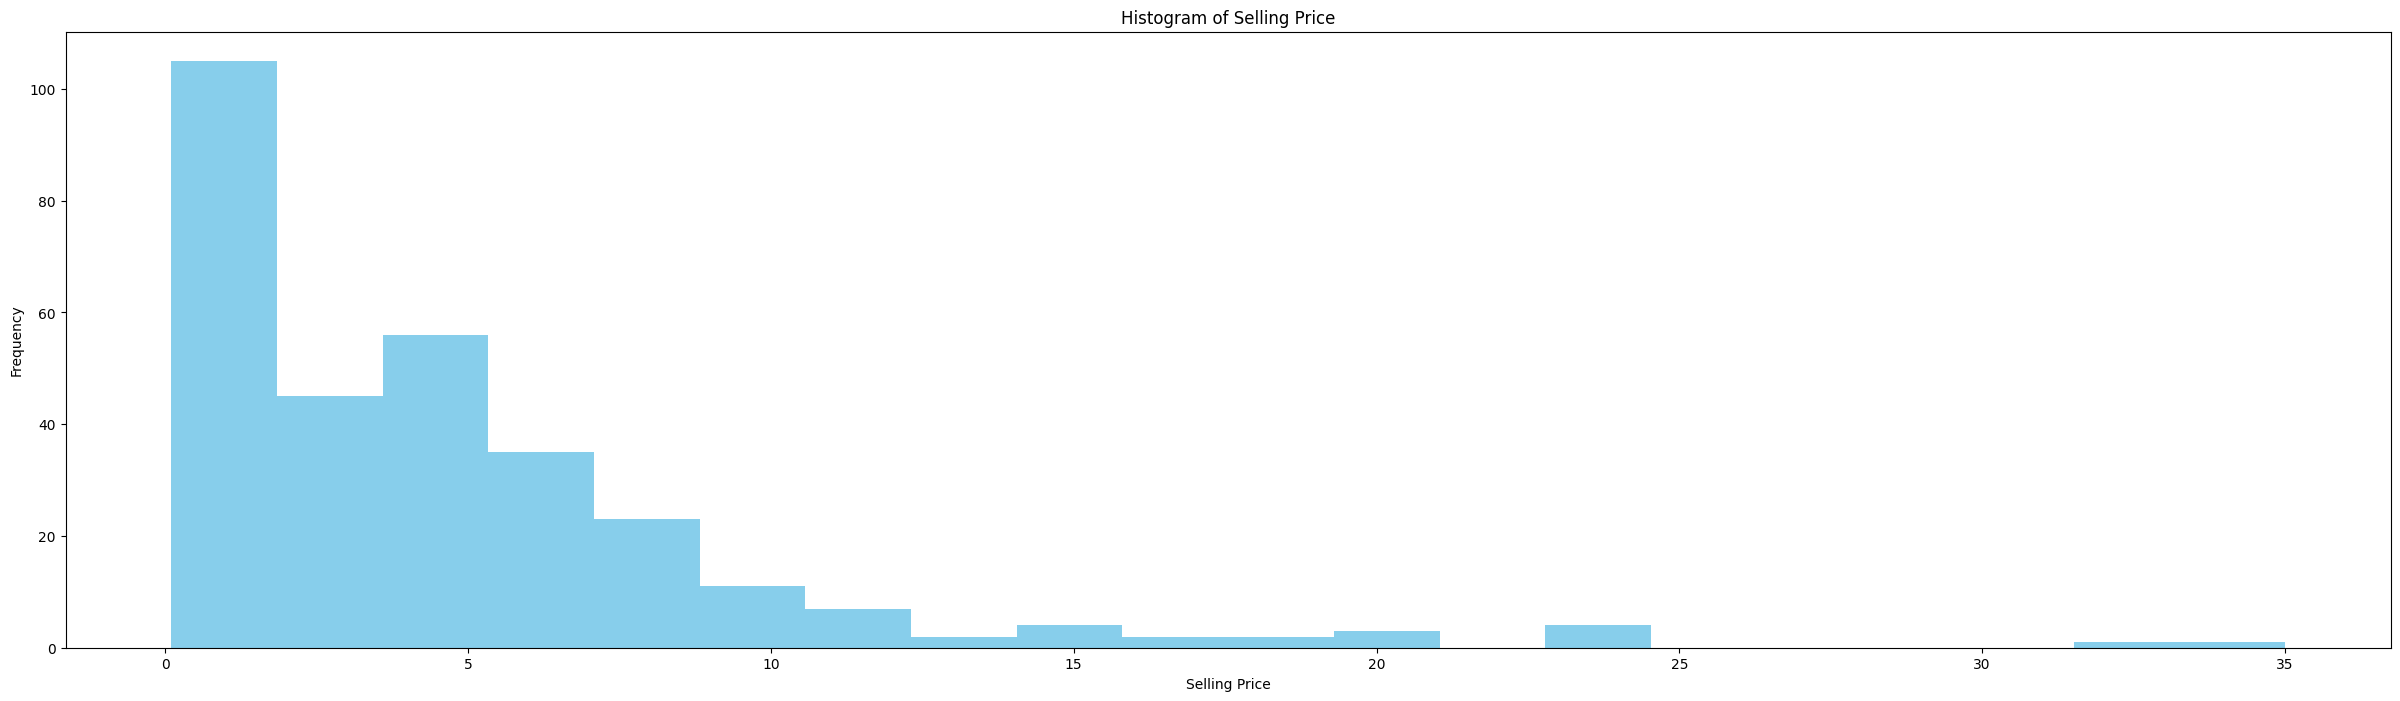

In [ ]:
# Histogram untuk Selling_Price
plt.figure(figsize=(30, 8))
plt.hist(df['Selling_Price'], bins=20, color='skyblue')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

A histogram that has a peak at the beginning with values decreasing sharply towards the right indicates a distribution that is strongly skewed to the right. This usually means most of the values in the dataset are low values, with a few very high values.

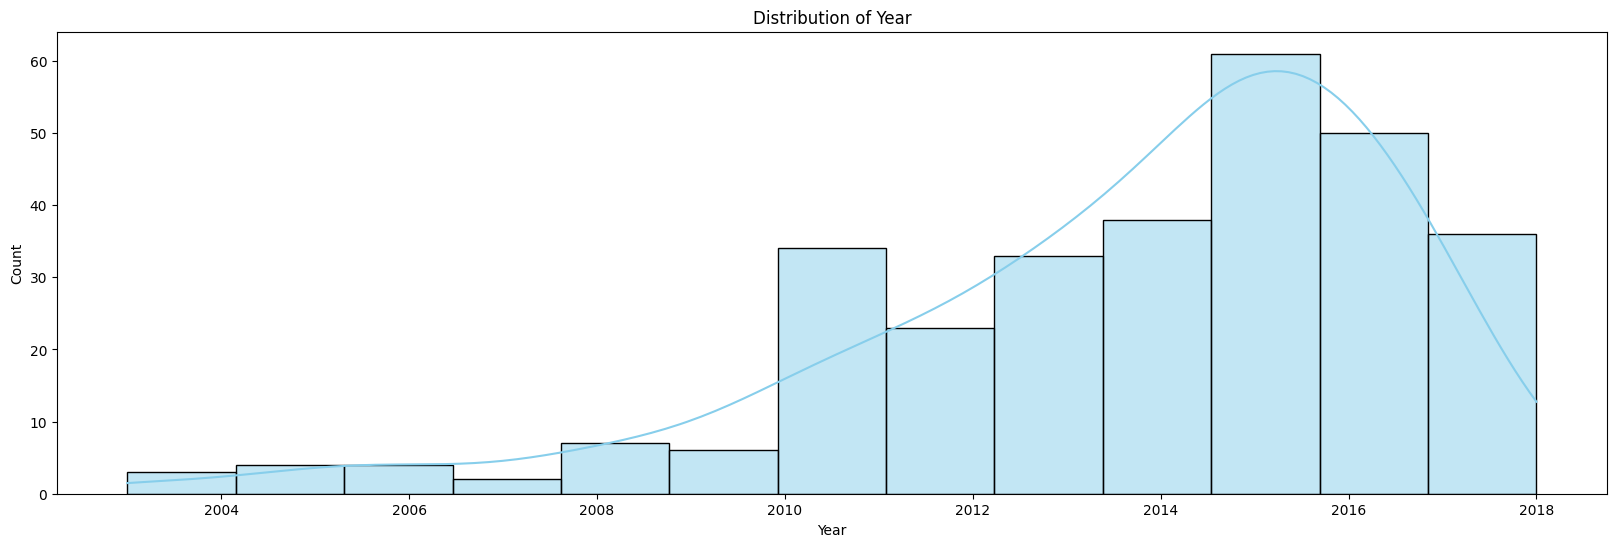

In [ ]:
#Distribusi pertahun
plt.figure(figsize=(20, 6))
sns.histplot(df['Year'], kde=True, color='skyblue')
plt.title('Distribution of Year')
plt.show()

most cars purchased in 2016

In [ ]:
# Encoding the categorical Data (Fuel_Type)
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding the categorical Data (Seller_Type)
df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Encoding the categorical Data (Transmission)
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [ ]:
df

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,1,0,0,0
297,brio,honda,2015,4.00,5.90,60000,0,0,0,0
298,city,honda,2009,3.35,11.00,87934,0,0,0,0
299,city,honda,2017,11.50,12.50,9000,1,0,0,0


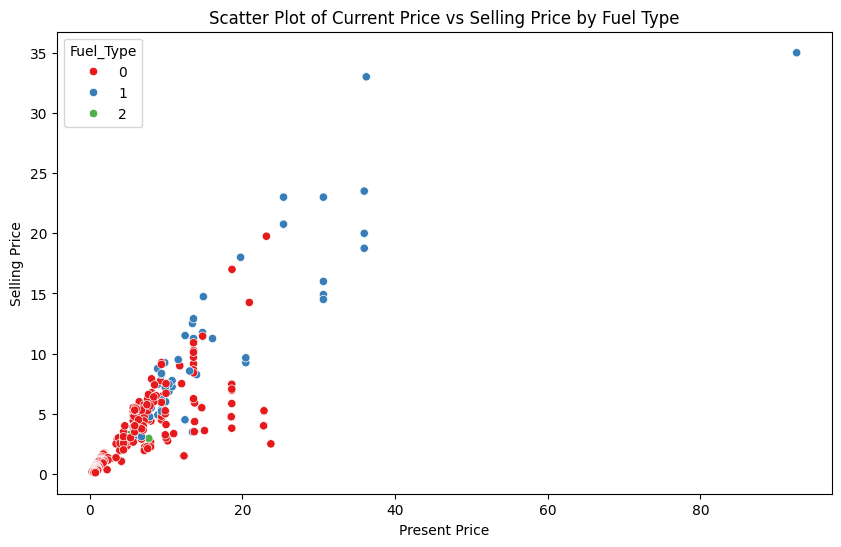

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', palette='Set1')
plt.title('Scatter Plot of Current Price vs Selling Price by Fuel Type')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

The most frequently purchased fuel is diesel

<ipython-input-78-7c9685273506>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type', y='Selling_Price', data=df, palette='coolwarm')


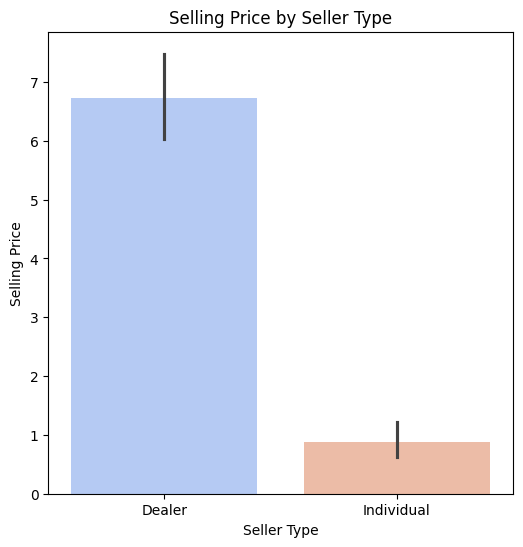

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Seller_Type', y='Selling_Price', data=df, palette='coolwarm')
plt.title('Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

sales type people buy the most cars from dealers

<ipython-input-80-15e79467e76a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')


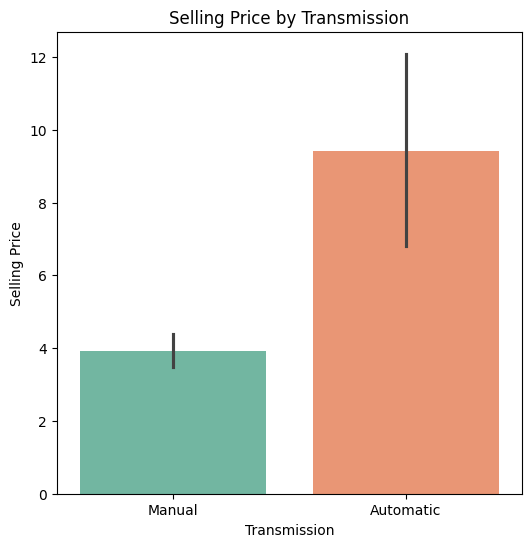

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Transmission', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

Most people buy automatic cars

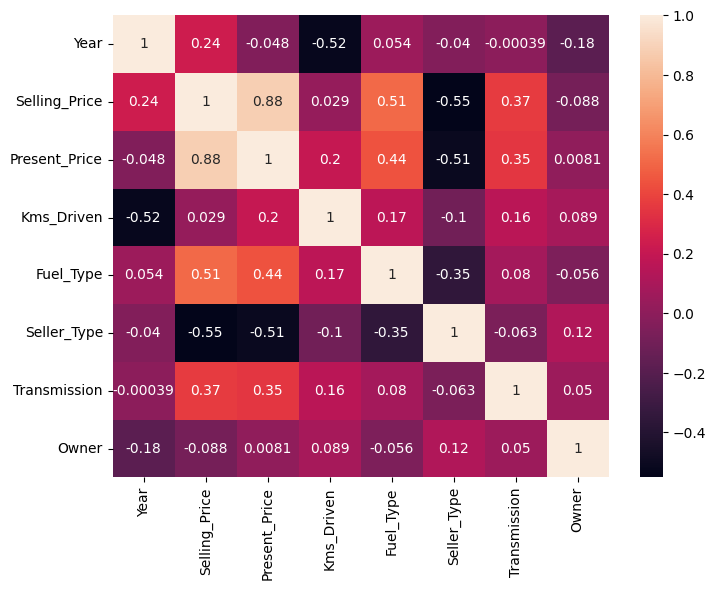

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Perfect positive correlation.

# **Model Building**

Performing multiple Linear Regression

In [ ]:
# Pisahkan fitur dan target
X = df[['Year', 'Present_Price', 'Kms_Driven']]  # Tambahkan fitur-fitur tambahan di sini
y = df['Selling_Price']  # Ini adalah target

In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print ("X train : ",X_train.shape)
print ("Y train :",y_train.shape)
print ("X test : ",X_test.shape)
print ("Y test :",y_test.shape)

X train :  (240, 3)
Y train : (240,)
X test :  (61, 3)
Y test : (61,)


In [ ]:
lin_reg = LinearRegression()

In [ ]:
# Latih model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Melihat koefisien dan intercept dari model
print("Intercept:", lin_reg.intercept_)


Intercept: -893.1959328776992


In [ ]:
# Dictionary untuk menyimpan fitur dan koefisien
coef_dict = {
    'features': X.columns,
    'coef_value': lin_reg.coef_
}

# Membuat DataFrame dari dictionary
coef = pd.DataFrame(coef_dict)

# Menampilkan DataFrame
coef


,features,coef_value
0,Year,4.439625e-01
1,Present_Price,5.154305e-01
2,Kms_Driven,-7.458472e-07


In [ ]:
# Prediksi pada test set
predict = lin_reg.predict(X_test)

In [ ]:
predict

array([ 2.10830482,  8.83407476,  4.85685547, -0.11971186, 10.06284876,
        5.95448779,  2.12673808,  1.39209688,  2.10030038,  6.03945488,
        7.78547159,  1.2335922 ,  7.13907998,  2.53827219,  5.31200565,
        2.97284635,  0.94998598, 11.87750733,  2.54829042,  3.21341152,
        0.86783645,  6.6629614 ,  4.87749903,  2.16967852,  1.43611483,
        3.53022813,  5.56099373,  2.52363397,  3.02585073,  2.59213024,
        0.89423259,  8.11352303, -0.36184397,  1.92277873,  7.36183311,
        4.52639347,  8.01334065,  8.27059098,  2.73114769,  8.68742349,
        3.95428148,  2.76962218,  4.22906875,  1.33065794,  5.80137072,
        1.09517182,  7.92441135, 10.87624478,  2.84912711,  3.51745028,
        5.3185706 ,  3.03099707, 19.88827216, 15.35196415,  6.18771287,
        8.81932712,  4.32305064,  7.78605337,  1.27242417,  6.20233706,
        0.77709663])

In [ ]:
# Hitung perbedaan antara setiap nilai prediksi berurutan
differences = np.diff(predict)

# Tentukan apakah ada kenaikan (True) atau penurunan (False)
trends = differences > 0

# Hasil
print("Differences between consecutive predictions:", differences)
print("Trends (True indicates increase, False indicates decrease):", trends)

Differences between consecutive predictions: [ 6.72576994 -3.97721929 -4.97656733 10.18256062 -4.10836098 -3.82774971
 -0.7346412   0.7082035   3.93915451  1.74601671 -6.55187939  5.90548778
 -4.60080779  2.77373346 -2.3391593  -2.02286037 10.92752135 -9.3292169
  0.6651211  -2.34557508  5.79512495 -1.78546237 -2.70782051 -0.7335637
  2.0941133   2.0307656  -3.03735976  0.50221675 -0.43372049 -1.69789764
  7.21929044 -8.47536701  2.2846227   5.43905439 -2.83543964  3.48694718
  0.25725033 -5.53944329  5.95627579 -4.73314201 -1.1846593   1.45944656
 -2.89841081  4.47071279 -4.7061989   6.82923953  2.95183343 -8.02711767
  0.66832316  1.80112033 -2.28757353 16.85727508 -4.536308   -9.16425128
  2.63161425 -4.49627648  3.46300273 -6.5136292   4.92991289 -5.42524043]
Trends (True indicates increase, False indicates decrease): [ True False False  True False False False  True  True  True False  True
 False  True False False  True False  True False  True False False False
  True  True False  

**Evaluation model**

In [ ]:
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse ** 0.5
r2 = lin_reg.score(X_test, y_test)

print("Mean Absolute Error     :", mae)
print("Mean Squared Error      :", mse)
print("Root Mean Squared Error :", rmse)
print("R^2 Score               :", r2)


Mean Absolute Error     : 1.3638305462401632
Mean Squared Error      : 4.010554030280757
Root Mean Squared Error : 2.00263676943193
R^2 Score               : 0.8258974489339234


In [ ]:
lin_reg.score(X_test,y_test)

0.8258974489339234

In [ ]:
lin_reg.predict([[2017, 6.0, 5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.36522583])

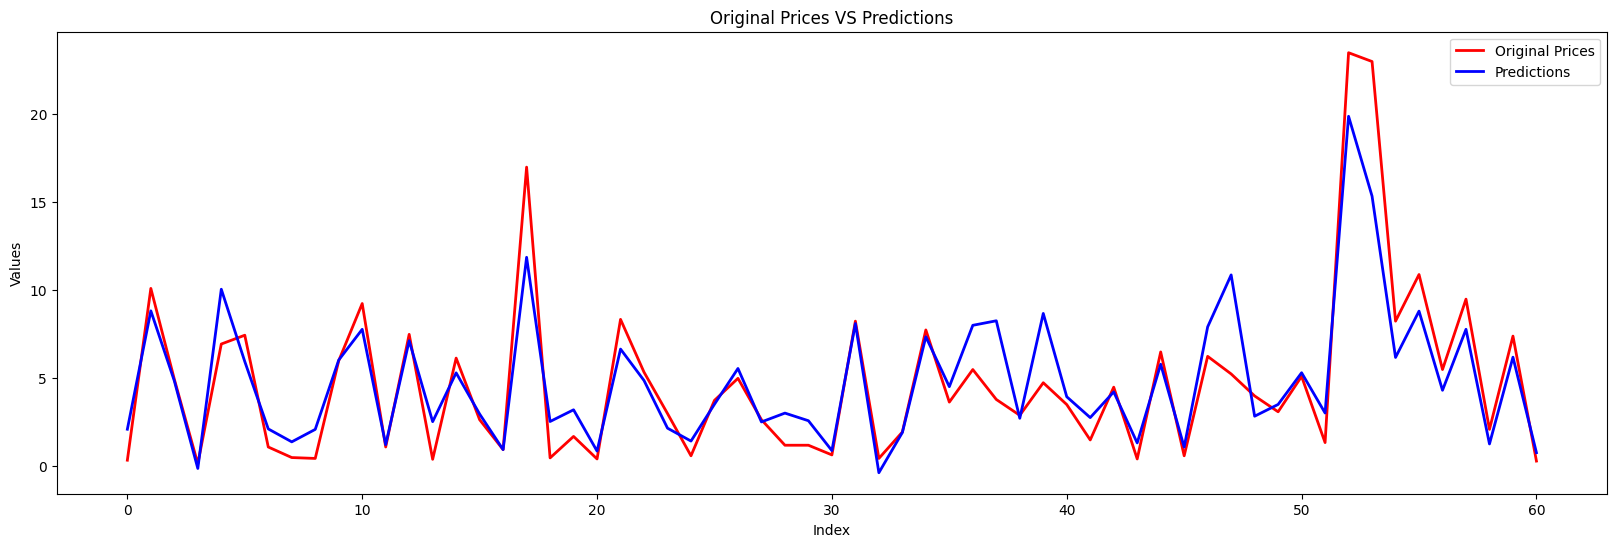

In [ ]:
# Menggunakan metode predict untuk membuat prediksi pada data uji
predict = lin_reg.predict(X_test)

# Mengubah y_test menjadi DataFrame dan mengatur ulang indeks
y_test1 = y_test.reset_index()['Selling_Price']

# Memplot original prices
ax = y_test1.plot(label="Original Prices", figsize=(30, 6), linewidth=2, color="red")

# Memplot predictions
ax = pd.Series(predict).plot(label="Predictions", figsize=(20, 6), linewidth=2, color="Blue")

# Menambahkan legenda, judul, dan label sumbu
plt.legend(loc='upper right')
plt.title("Original Prices VS Predictions")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()
